In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df.drop(columns='deck',inplace=True)

<AxesSubplot:xlabel='age'>

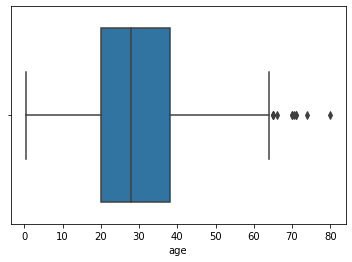

In [8]:
# checking outlier in age column so that we cant fill mean at nan values
sns.boxplot(x ='age',data=df)

In [9]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [10]:
df.age.median()

28.0

In [11]:
df.age.fillna(df.age.median(),inplace=True)

In [12]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [13]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [16]:
df.embarked.fillna('S',inplace=True)

In [17]:
df.embark_town.mode()[0]

'Southampton'

In [18]:
df.embark_town.fillna(df.embark_town.mode()[0],inplace=True)

In [19]:
df.isna().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [21]:
df.drop(columns=['who','adult_male','alone','embarked','alive'],inplace=True)

In [22]:
df.sex = df.sex.map({'male':1,'female':0} )

In [23]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [24]:
df['class'] = df['class'].map({'First':1,'Second':2,'Third':3})

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town
0,0,3,1,22.0,1,0,7.2500,3,Southampton
1,1,1,0,38.0,1,0,71.2833,1,Cherbourg
2,1,3,0,26.0,0,0,7.9250,3,Southampton
3,1,1,0,35.0,1,0,53.1000,1,Southampton
4,0,3,1,35.0,0,0,8.0500,3,Southampton


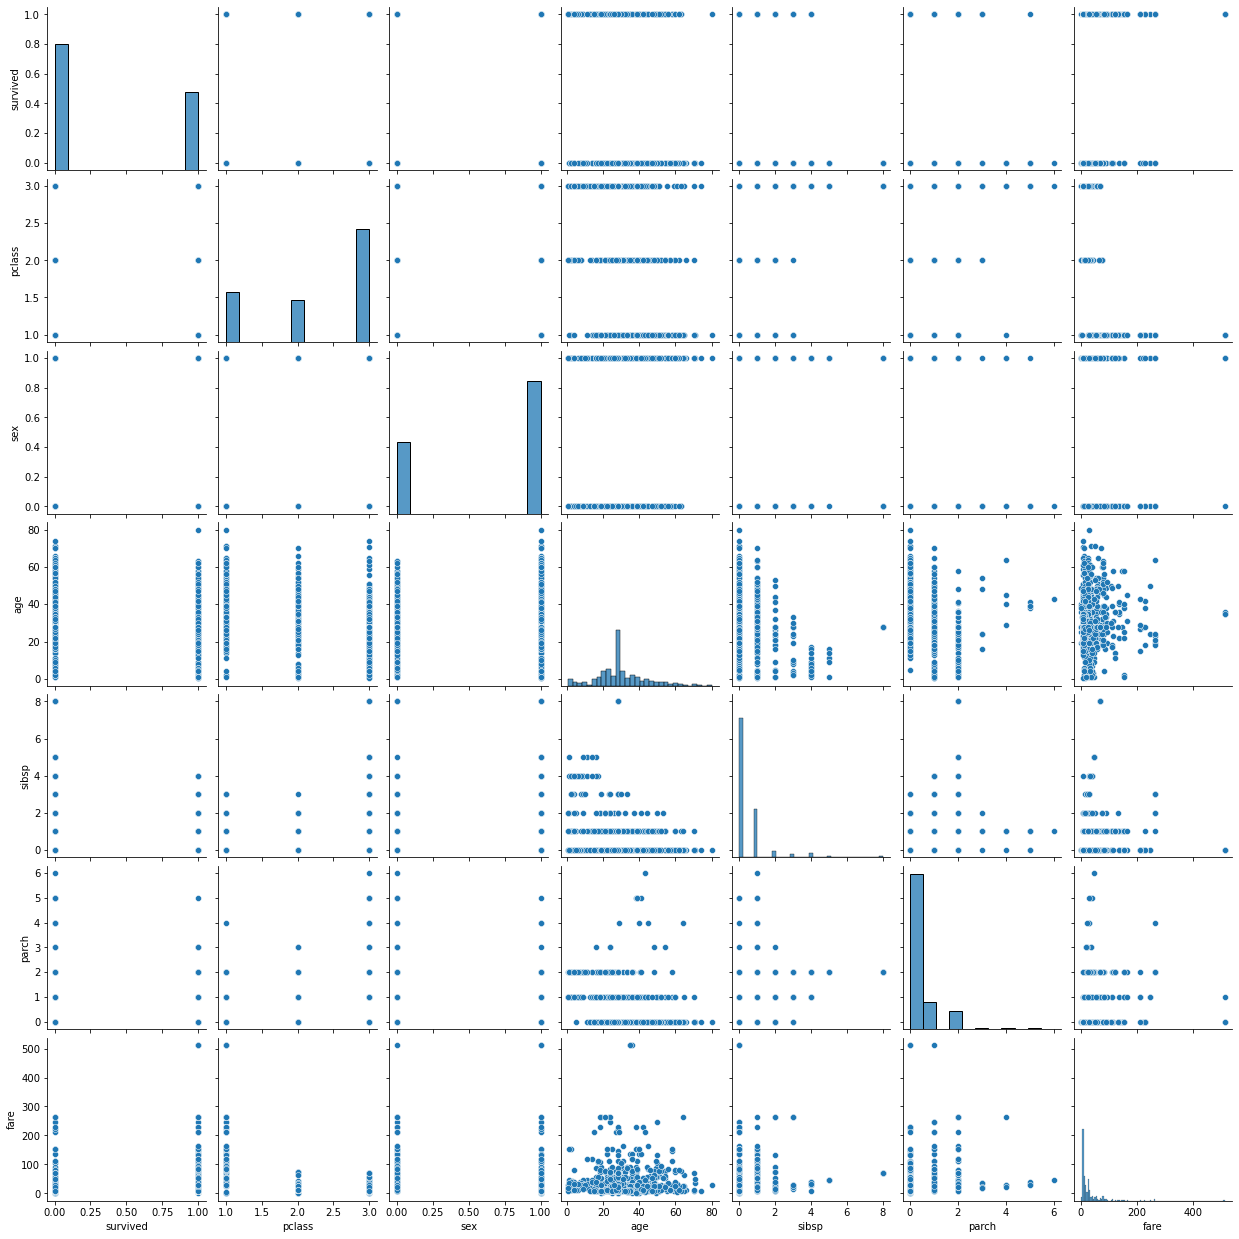

In [26]:
sns.pairplot(df)

<AxesSubplot:>

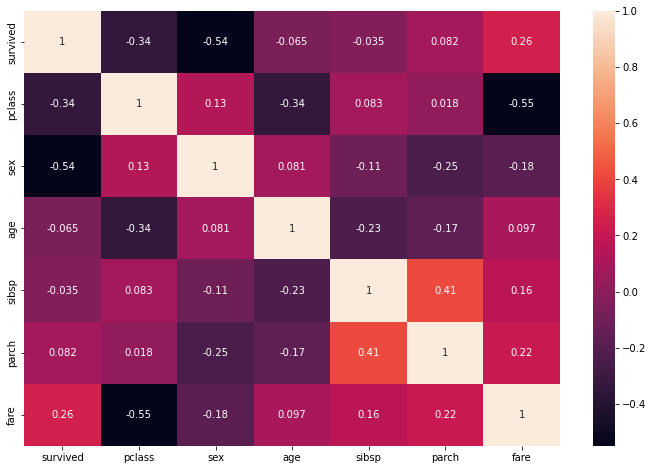

In [27]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True)

In [28]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'embark_town'],
      dtype='object')

In [29]:
#X = df[['age', 'sibsp', 'parch', 'fare']]
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class']]
y = df['survived']

In [30]:
X.head(3)

,pclass,sex,age,sibsp,parch,fare,class
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,3


In [31]:
y.head(3)

0    0
1    1
2    1
Name: survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [34]:
model = make_pipeline(StandardScaler(),LogisticRegression())

In [35]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [36]:
model.score(X_train,y_train)*100

78.79213483146067

In [37]:
model.score(X_test,y_test)*100

81.00558659217877

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import log_loss,confusion_matrix,precision_score,recall_score,f1_score,classification_report


In [40]:
log_loss(y_test,y_pred)

6.560518380897803

In [41]:
confusion_matrix(y_test,y_pred)

array([[100,  18],
       [ 16,  45]], dtype=int64)

In [42]:
precision_score(y_test,y_pred)*100

71.42857142857143

In [43]:
recall_score(y_test,y_pred)*100

73.77049180327869

In [44]:
f1_score(y_test,y_pred)*100

72.58064516129032

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       118
           1       0.71      0.74      0.73        61

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



# Tuning based on ROC curve

In [46]:
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score

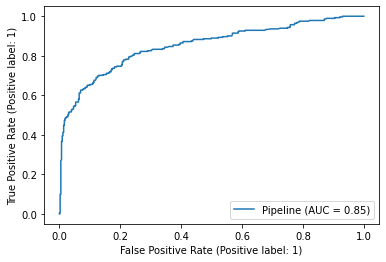

In [47]:
plot_roc_curve(model,X_train,y_train)

In [48]:
fpr, tpr, thresholds = roc_curve(y_train,model.predict_proba(X_train)[:,1],drop_intermediate=False)

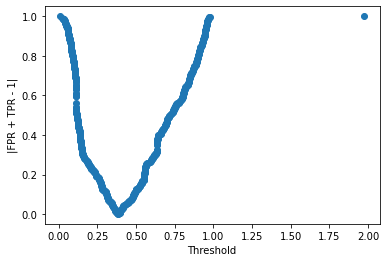

In [49]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [50]:
thresholds[np.argmin(np.abs(fpr+tpr-1))]

0.3838184646038695

In [51]:
threshold = []
accuracy = []

for p in np.unique(model.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (model.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

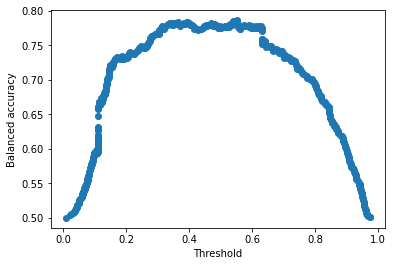

In [52]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [53]:
threshold[np.argmax(accuracy)]

0.5526975762412294